#Building QSAR machine learning models for drug discovery against LEPRA

##Step 2: Installing the lazypredict package

##Step 3: Importing and visualizing the pre-processed database

In [23]:
### 3.1: Importing the dataset.

from google.colab import files
uploaded = files.upload()

Saving eNOS-dataset_final_LEPRA.csv to eNOS-dataset_final_LEPRA (2).csv


In [24]:
### 3.2: Visualizing the imported dataset.

import pandas as pd
df1 = pd.read_csv("eNOS-dataset_final_LEPRA.csv")
display (df1)

,Unnamed: 0,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7.853872
1,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7.744727
2,2,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6.892790
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7.823909
4,4,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1892,1892,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6.847712
1893,1893,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7.468521
1894,1894,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7.096910
1895,1895,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7.619789


In [25]:
## Removing non-informative variables.
df1 = df1.drop("Unnamed: 0", axis = 1)

In [26]:
# Removing empty rows (independent variables).
df1 = df1.dropna()

In [27]:
df1

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.853872
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.744727
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.892790
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.823909
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1892,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.847712
1893,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.468521
1894,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.096910
1895,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.619789


In [28]:
# Removing infinite values.
import pandas as pd

# Replacing infinite values with NaN.
df1.replace([float('inf'), float('-inf')], pd.NA, inplace=True)

# Removing rows that contain NaN values.
df1.dropna(inplace=True)

In [29]:
df1

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.853872
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.744727
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.892790
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.823909
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1892,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.847712
1893,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.468521
1894,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.096910
1895,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.619789


# Importing and pre-processing external dataset

##**Step 4: Building ML models**

In [30]:
x = df1.drop("pIC50", axis = 1)
y = df1["pIC50"]

In [31]:
x

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1892,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1893,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1894,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1895,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [32]:
### 3.1. Removing descriptors with low variance
from sklearn.feature_selection import VarianceThreshold

def remove_baixa_variancia(input_data, threshold=0.1):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]
x = remove_baixa_variancia(x, threshold=0.1)
x

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP20,PubchemFP23,PubchemFP24,PubchemFP33,...,PubchemFP756,PubchemFP758,PubchemFP776,PubchemFP777,PubchemFP779,PubchemFP797,PubchemFP798,PubchemFP818,PubchemFP819,PubchemFP821
0,1,1,1,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1,1,1,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,1,1,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,1,1,0,1,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1892,1,0,0,1,0,0,1,0,0,0,...,1,0,1,1,0,1,1,1,1,0
1893,1,0,0,1,0,0,1,0,0,0,...,1,0,1,1,0,1,1,1,1,0
1894,1,0,0,1,0,0,1,0,0,0,...,1,0,1,1,0,1,1,1,1,0
1895,1,0,0,1,0,0,1,0,0,0,...,0,0,1,1,0,1,1,1,1,0


In [11]:
y

,pIC50
0,7.853872
1,7.744727
2,6.892790
3,7.823909
4,8.000000
...,...
1892,6.847712
1893,7.468521
1894,7.096910
1895,7.619789


# Splitting the data into training and testing sets.

In [33]:
###  Importing packages for visualizing the results of machine learning models.
import seaborn as sns


# Importing packages for splitting the data into training and testing sets.
import sklearn
from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3, random_state=100)

# Top 1: Machine learning

In [34]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Initialize the Extra Trees Regressor
modelo1 = HistGradientBoostingRegressor() # Insert a machine learning model here.
modelo1.fit(x_treino, y_treino)


y_predito1 = modelo1.predict(x_teste)


# Calculating the R²
r2_treino = modelo1.score(x_treino, y_treino)
print("R2 treino : " + str(r2_treino))

# Test results
r2_teste = modelo1.score(x_teste, y_teste)
print("R2 teste : " + str(r2_teste))

# Calculating MSE (Mean Squared Error)
mse_treino = mean_squared_error(y_treino, modelo1.predict(x_treino))
print("MSE treino : " + str(mse_treino))

mse_teste = mean_squared_error(y_teste, y_predito1)
print("MSE teste : " + str(mse_teste))

# Calculating RMSE (Root Mean Squared Error)
rmse_treino = np.sqrt(mse_treino)
print("RMSE treino : " + str(rmse_treino))

rmse_teste = np.sqrt(mse_teste)
print("RMSE teste : " + str(rmse_teste))

# Calculating MAE (Mean Absolute Error)
mae_treino = mean_absolute_error(y_treino, modelo1.predict(x_treino))
print("MAE treino : " + str(mae_treino))

mae_teste = mean_absolute_error(y_teste, y_predito1)
print("MAE teste : " + str(mae_teste))

R2 treino : 0.8122284344987605
R2 teste : 0.5782801154704729
MSE treino : 0.2802740415521337
MSE teste : 0.5926136877092522
RMSE treino : 0.5294091438123577
RMSE teste : 0.7698140604777572
MAE treino : 0.38272867713660363
MAE teste : 0.5694872770085776


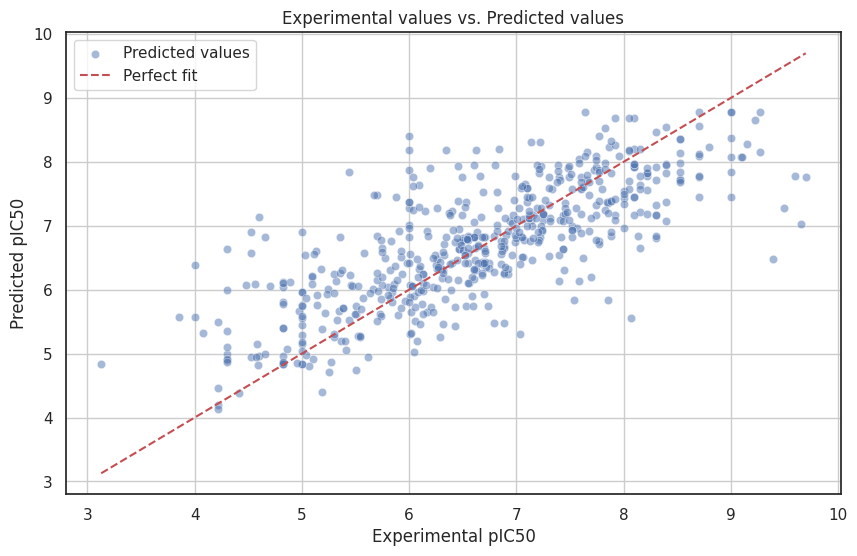

In [35]:
# Building the graph of experimental values versus predicted values
import matplotlib.pyplot as plt  # Add this line to import matplotlib.pyplot:

import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_teste, y=y_predito1, alpha=0.5, label='Predicted values', color='b')
sns.lineplot(x=[y_teste.min(), y_teste.max()], y=[y_teste.min(), y_teste.max()], color='r', linestyle='--', label='Perfect fit')
plt.xlabel('Experimental pIC50')
plt.ylabel('Predicted pIC50')
plt.title('Experimental values vs. Predicted values')
plt.legend()
plt.grid(True)
plt.show()

# Residual plot for the training set

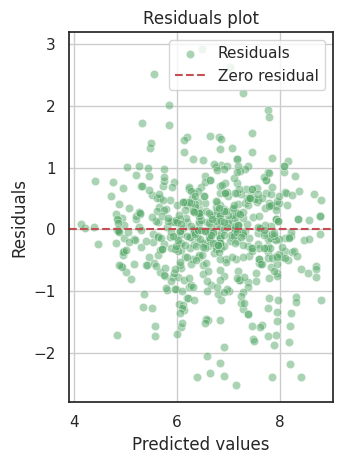

In [36]:
# Building the residual plot
residuos = y_teste - y_predito1

plt.subplot(1, 2, 2)
sns.scatterplot(x=y_predito1, y=residuos, alpha=0.5, label='Residuals', color='g')
plt.axhline(y=0, color='r', linestyle='--', label='Zero residual')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residuals plot')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Removing outliers

In [37]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Step 1: Calculate residuals
residuos = y_teste - y_predito1

# Step 2: Calculate the standard deviation of residuals
desvio_padrao_residuos = np.std(residuos)

# Step 3: Define a threshold for outlier detection
limite = 1.5 * desvio_padrao_residuos

# Step 4: Identify outliers
outlier_mask = np.abs(residuos) <= limite

# Step 5: Remove outliers while preserving feature names
x_teste_sem_outliers = x_teste[outlier_mask]
y_teste_sem_outliers = y_teste[outlier_mask]

# Step 6: Train the model on the training data
modelo_sem_outliers = HistGradientBoostingRegressor()
modelo_sem_outliers.fit(x_treino, y_treino)

# Step 7: Make predictions on the cleaned test data
y_predito_treino_sem_outliers = modelo_sem_outliers.predict(x_treino)
y_predito_teste_sem_outliers = modelo_sem_outliers.predict(x_teste_sem_outliers)

# Step 8: Calculate performance metrics for the training data without outliers
r2_sem_outliers_treino = modelo_sem_outliers.score(x_treino, y_treino)
r2_sem_outliers_teste = modelo_sem_outliers.score(x_teste_sem_outliers, y_teste_sem_outliers)

rmse_sem_outliers_treino = np.sqrt(mean_squared_error(y_treino, y_predito_treino_sem_outliers))
rmse_sem_outliers_teste = np.sqrt(mean_squared_error(y_teste_sem_outliers, y_predito_teste_sem_outliers))

mae_sem_outliers_treino = mean_absolute_error(y_treino, y_predito_treino_sem_outliers)
mae_sem_outliers_teste = mean_absolute_error(y_teste_sem_outliers, y_predito_teste_sem_outliers)

mse_sem_outliers_treino = mean_squared_error(y_treino, y_predito_treino_sem_outliers)
mse_sem_outliers_teste = mean_squared_error(y_teste_sem_outliers, y_predito_teste_sem_outliers)

# Step 9: Print the results
print("R2 treino (sem outliers): " + str(r2_sem_outliers_treino))
print("R2 teste (sem outliers): " + str(r2_sem_outliers_teste))
print("RMSE treino (sem outliers): " + str(rmse_sem_outliers_treino))
print("RMSE teste (sem outliers): " + str(rmse_sem_outliers_teste))
print("MAE treino (sem outliers): " + str(mae_sem_outliers_treino))
print("MAE teste (sem outliers): " + str(mae_sem_outliers_teste))
print("MSE treino (sem outliers): " + str(mse_sem_outliers_treino))
print("MSE teste (sem outliers): " + str(mse_sem_outliers_teste))

R2 treino (sem outliers): 0.8122284344987605
R2 teste (sem outliers): 0.7792711864799979
RMSE treino (sem outliers): 0.5294091438123577
RMSE teste (sem outliers): 0.5141072352670595
MAE treino (sem outliers): 0.38272867713660363
MAE teste (sem outliers): 0.4155676729430117
MSE treino (sem outliers): 0.2802740415521337
MSE teste (sem outliers): 0.26430624935393965


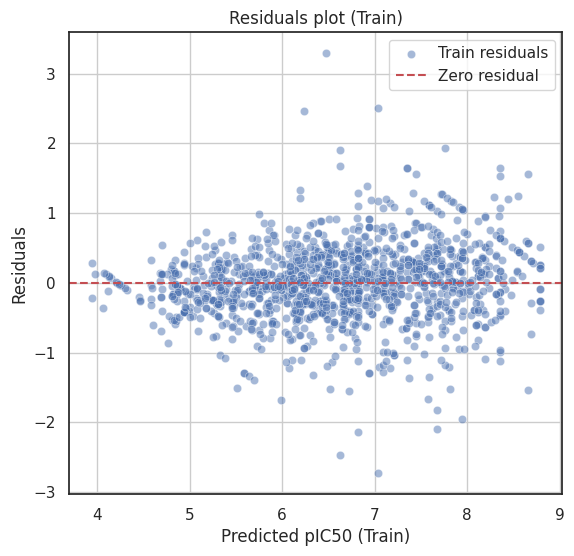

In [38]:
# Calculating the residuals for training and testing sets
residuos_treino = y_treino - y_predito_treino_sem_outliers
residuos_teste = y_teste_sem_outliers - y_predito_teste_sem_outliers

#Plotting the residual plots for training and testing sets
plt.figure(figsize=(14, 6))

# Residual plot for the training data
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_predito_treino_sem_outliers, y=residuos_treino, alpha=0.5, color='b', label='Train residuals')
plt.axhline(y=0, color='r', linestyle='--', label='Zero residual')
plt.xlabel('Predicted pIC50 (Train)')
plt.ylabel('Residuals')
plt.title('Residuals plot (Train)')
plt.legend()
plt.grid(True)

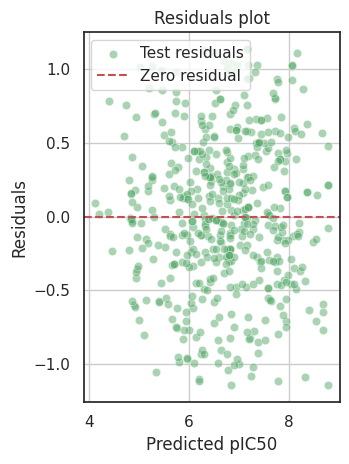

In [39]:
# Residual plot for the testing data
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_predito_teste_sem_outliers, y=residuos_teste, alpha=0.5, color='g', label='Test residuals')
plt.axhline(y=0, color='r', linestyle='--', label='Zero residual')
plt.xlabel('Predicted pIC50')
plt.ylabel('Residuals')
plt.title('Residuals plot')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

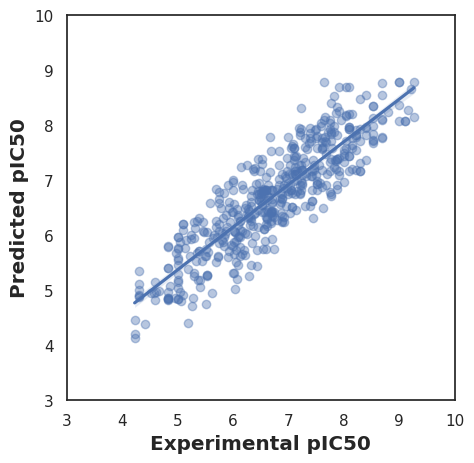

In [40]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

# Calculating the residuals
residuos = y_teste - y_predito1

# Calculating the square root of the mean squared error (RMSE)
rmse = np.sqrt(mean_squared_error(y_teste, y_predito1))

# Calculating the standard deviation of the residuals
desvio_padrao_residuos = np.std(residuos)

# Defining a threshold to identify outliers
limite = 1.5 * desvio_padrao_residuos

# Finding the indices of points that are beyond the threshold
indices_outliers = np.where(np.abs(residuos) > limite)

# Removing the outliers from the data
y_teste_sem_outliers = np.delete(y_teste, indices_outliers)
y_predito_sem_outliers = np.delete(y_predito1, indices_outliers)


# Make sure that the arrays y_teste_sem_outliers and y_predito_sem_outliers are of type float64
y_teste_sem_outliers = y_teste_sem_outliers.astype(np.float64)
y_predito_sem_outliers = y_predito_sem_outliers.astype(np.float64)

# Building the scatter plot without outliers
ax = sns.regplot(x=y_teste_sem_outliers, y=y_predito_sem_outliers, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(3, 10)
ax.set_ylim(3, 10)
ax.figure.set_size_inches(5, 5)
plt.show()

In [41]:
y_teste_sem_outliers

array([6.82390874, 6.5543958 , 4.30103   , 8.09691001, 6.05749589,
       6.04575749, 5.24033216, 7.21467016, 5.        , 7.30103   ,
       7.4202164 , 6.49349497, 5.69897   , 7.95860731, 6.26121944,
       6.00877392, 6.31605287, 7.74472749, 5.21467016, 6.30980392,
       5.74641971, 6.        , 5.9788107 , 6.66756154, 7.09691001,
       4.22184875, 7.04575749, 7.52287875, 7.23657201, 7.04095861,
       6.16749109, 8.69897   , 9.        , 6.74472749, 4.82390874,
       7.39794001, 4.97506303, 6.67778071, 4.58838029, 9.26760624,
       4.52287875, 7.24412514, 7.22914799, 7.13667714, 6.95860731,
       8.69897   , 7.52287875, 5.        , 4.82390874, 7.43179828,
       6.55284197, 5.        , 7.48148606, 6.52287875, 5.84193921,
       6.1266794 , 5.4424928 , 7.45099674, 5.50723961, 6.88605665,
       6.93930216, 6.61978876, 4.82390874, 6.36251027, 5.18708664,
       7.88605665, 6.39794001, 6.12493874, 8.39794001, 7.25181197,
       7.60205999, 6.99139983, 8.52287875, 4.82390874, 6.22184

# Hyperparameters optimization

In [42]:
# 1. Random Search

In [43]:
import numpy as np
from sklearn.experimental import enable_hist_gradient_boosting  # This is required to enable hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from scipy.stats import randint, uniform

# Define the hyperparameter space for HistGradientBoostingRegressor
param_dist = {
    'max_iter': randint(100, 500),
    'max_depth': randint(3, 20),
    'min_samples_leaf': randint(1, 20),
    'learning_rate': uniform(0.01, 0.3),
    'l2_regularization': uniform(0.1, 1.0),
    'max_bins': randint(10, 255)  # Bins used for histograms
}

# Setup Random Search with HistGradientBoostingRegressor
random_search = RandomizedSearchCV(
    HistGradientBoostingRegressor(),
    param_distributions=param_dist,
    n_iter=100,  # Number of iterations for Random Search
    cv=10,
    verbose=1,
    random_state=42,
    n_jobs=1  # Use only one core
)

# Fit Random Search
random_search.fit(x_treino, y_treino)

# Get the best model
modelo_sem_outliers = random_search.best_estimator_

# Calculate predictions
y_predito_treino_sem_outliers = modelo_sem_outliers.predict(x_treino)
y_predito_teste_sem_outliers = modelo_sem_outliers.predict(x_teste_sem_outliers)

# Calculate metrics
r2_sem_outliers_treino = modelo_sem_outliers.score(x_treino, y_treino)
r2_sem_outliers_teste = modelo_sem_outliers.score(x_teste_sem_outliers, y_teste_sem_outliers)
rmse_sem_outliers_treino = np.sqrt(mean_squared_error(y_treino, y_predito_treino_sem_outliers))
rmse_sem_outliers_teste = np.sqrt(mean_squared_error(y_teste_sem_outliers, y_predito_teste_sem_outliers))
mae_sem_outliers_treino = np.mean(np.abs(y_treino - y_predito_treino_sem_outliers))
mae_sem_outliers_teste = np.mean(np.abs(y_teste_sem_outliers - y_predito_teste_sem_outliers))
mse_sem_outliers_treino = mean_squared_error(y_treino, y_predito_treino_sem_outliers)
mse_sem_outliers_teste = mean_squared_error(y_teste_sem_outliers, y_predito_teste_sem_outliers)

# Print the results
print("Best Parameters:", random_search.best_params_)
print("R2 treino (sem outliers):", r2_sem_outliers_treino)
print("R2 teste (sem outliers):", r2_sem_outliers_teste)
print("RMSE treino (sem outliers):", rmse_sem_outliers_treino)
print("RMSE teste (sem outliers):", rmse_sem_outliers_teste)
print("MAE treino (sem outliers):", mae_sem_outliers_treino)
print("MAE teste (sem outliers):", mae_sem_outliers_teste)
print("MSE treino (sem outliers):", mse_sem_outliers_treino)
print("MSE teste (sem outliers):", mse_sem_outliers_teste)


Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best Parameters: {'l2_regularization': 0.3332280724245278, 'learning_rate': 0.1843916251680347, 'max_bins': 118, 'max_depth': 3, 'max_iter': 441, 'min_samples_leaf': 17}
R2 treino (sem outliers): 0.8097267736639481
R2 teste (sem outliers): 0.7444511842746946
RMSE treino (sem outliers): 0.532924106374031
RMSE teste (sem outliers): 0.5531732082761119
MAE treino (sem outliers): 0.38157520658576355
MAE teste (sem outliers): 0.43774335132616704
MSE treino (sem outliers): 0.2840081031545595
MSE teste (sem outliers): 0.3060005983544867


In [44]:
# Bayesian aproach

In [45]:
!pip install scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 2.4 MB/s eta 0:00:00


In [46]:
import numpy as np
from sklearn.experimental import enable_hist_gradient_boosting  # Enable HistGradientBoostingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from skopt import BayesSearchCV  # Import BayesSearchCV for Bayesian optimization
from skopt.space import Integer, Real

# Define the hyperparameter space for Bayesian Search with HistGradientBoostingRegressor
param_space = {
    'learning_rate': Real(0.01, 0.3, 'uniform'),
    'max_iter': Integer(100, 500),
    'max_depth': Integer(3, 20),
    'min_samples_leaf': Integer(1, 20),
    'l2_regularization': Real(0.0, 1.0, 'uniform')
}

# Setup Bayesian Search with HistGradientBoostingRegressor
bayes_search = BayesSearchCV(
    HistGradientBoostingRegressor(),
    search_spaces=param_space,
    n_iter=50,  # Number of iterations for the Bayesian search
    cv=10,
    verbose=1,
    random_state=42,
    n_jobs=1  # Run in single thread
)

try:
    # Fit Bayesian Search
    bayes_search.fit(x_treino, y_treino)
except Exception as e:
    print("Error during fitting:", str(e))

# Get the best model from Bayesian optimization
modelo_bayesiano_sem_outliers = bayes_search.best_estimator_

# Calculate predictions
y_predito_treino_sem_outliers = modelo_bayesiano_sem_outliers.predict(x_treino)
y_predito_teste_sem_outliers = modelo_bayesiano_sem_outliers.predict(x_teste_sem_outliers)

# Calculate metrics
r2_sem_outliers_treino = modelo_bayesiano_sem_outliers.score(x_treino, y_treino)
r2_sem_outliers_teste = modelo_bayesiano_sem_outliers.score(x_teste_sem_outliers, y_teste_sem_outliers)
rmse_sem_outliers_treino = np.sqrt(mean_squared_error(y_treino, y_predito_treino_sem_outliers))
rmse_sem_outliers_teste = np.sqrt(mean_squared_error(y_teste_sem_outliers, y_predito_teste_sem_outliers))
mae_sem_outliers_treino = np.mean(np.abs(y_treino - y_predito_treino_sem_outliers))
mae_sem_outliers_teste = np.mean(np.abs(y_teste_sem_outliers - y_predito_teste_sem_outliers))
mse_sem_outliers_treino = mean_squared_error(y_treino, y_predito_treino_sem_outliers)
mse_sem_outliers_teste = mean_squared_error(y_teste_sem_outliers, y_predito_teste_sem_outliers)

# Print the results
print("Best Parameters:", bayes_search.best_params_)
print("R2 treino (sem outliers):", r2_sem_outliers_treino)
print("R2 teste (sem outliers):", r2_sem_outliers_teste)
print("RMSE treino (sem outliers):", rmse_sem_outliers_treino)
print("RMSE teste (sem outliers):", rmse_sem_outliers_teste)
print("MAE treino (sem outliers):", mae_sem_outliers_treino)
print("MAE teste (sem outliers):", mae_sem_outliers_teste)
print("MSE treino (sem outliers):", mse_sem_outliers_treino)
print("MSE teste (sem outliers):", mse_sem_outliers_teste)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for eac

In [47]:
# 3.Grid Search

In [48]:
!pip install --upgrade scikit-learn joblib

In [49]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Define a smaller hyperparameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 7],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 4],
    'bootstrap': [True, False]
}

# Initialize GridSearchCV with n_jobs set to 1
grid_search = GridSearchCV(
    RandomForestRegressor(),
    param_grid=param_grid,
    cv=10,
    verbose=1,
    n_jobs=1  # Use a single core
)

# Fit Grid Search
grid_search.fit(x_treino, y_treino)

# Get the best model
modelo_grid_search = grid_search.best_estimator_

# Calculate predictions
y_predito_treino_grid_search = modelo_grid_search.predict(x_treino)
y_predito_teste_grid_search = modelo_grid_search.predict(x_teste_sem_outliers)

# Calculate metrics
r2_grid_search_treino = modelo_grid_search.score(x_treino, y_treino)
r2_grid_search_teste = modelo_grid_search.score(x_teste_sem_outliers, y_teste_sem_outliers)
rmse_grid_search_treino = np.sqrt(mean_squared_error(y_treino, y_predito_treino_grid_search))
rmse_grid_search_teste = np.sqrt(mean_squared_error(y_teste_sem_outliers, y_predito_teste_grid_search))
mae_grid_search_treino = np.mean(np.abs(y_treino - y_predito_treino_grid_search))
mae_grid_search_teste = np.mean(np.abs(y_teste_sem_outliers - y_predito_teste_grid_search))
mse_grid_search_treino = mean_squared_error(y_treino, y_predito_treino_grid_search)
mse_grid_search_teste = mean_squared_error(y_teste_sem_outliers, y_predito_teste_grid_search)

# Print the results
print("Best Parameters:", grid_search.best_params_)
print("R2 treino (Grid Search):", r2_grid_search_treino)
print("R2 teste (Grid Search):", r2_grid_search_teste)
print("RMSE treino (Grid Search):", rmse_grid_search_treino)
print("RMSE teste (Grid Search):", rmse_grid_search_teste)
print("MAE treino (Grid Search):", mae_grid_search_treino)
print("MAE teste (Grid Search):", mae_grid_search_teste)
print("MSE treino (Grid Search):", mse_grid_search_treino)
print("MSE teste (Grid Search):", mse_grid_search_teste)


Fitting 10 folds for each of 32 candidates, totalling 320 fits
Best Parameters: {'bootstrap': True, 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
R2 treino (Grid Search): 0.6959634326720061
R2 teste (Grid Search): 0.7139153807896648
RMSE treino (Grid Search): 0.673657942876814
RMSE teste (Grid Search): 0.5852904746665071
MAE treino (Grid Search): 0.522156161868806
MAE teste (Grid Search): 0.472143523337504
MSE treino (Grid Search): 0.4538150240010208
MSE teste (Grid Search): 0.3425649397353452


# Comparing the Normal, Random Search, Bayesian and Grid Search tuning models

In [50]:
import matplotlib.pyplot as plt
import numpy as np

# Replace these placeholder values with actual results
results = {
    'Default': {
        'Train': {
            'R² Score': [0.81],
            'RMSE': [0.53],
            'MAE': [0.38],
            'MSE': [0.28]
        },
        'Test': {
            'R² Score': [0.78],
            'RMSE': [0.51],
            'MAE': [0.42],
            'MSE': [0.26]
        }
    },
    'Random Search': {
        'Train': {
            'R² Score': [0.81],
            'RMSE': [0.53],
            'MAE': [0.38],
            'MSE': [0.28]
        },
        'Test': {
            'R² Score': [0.74],
            'RMSE': [0.55],
            'MAE': [0.44],
            'MSE': [0.31]
        }
    },
    'Bayesian Search': {
        'Train': {
            'R² Score': [0.76],
            'RMSE': [0.60],
            'MAE': [0.44],
            'MSE': [0.36]
        },
        'Test': {
            'R² Score': [0.73],
            'RMSE': [0.56],
            'MAE': [0.46],
            'MSE': [0.32]
        }
    },
    'Grid Search': {
        'Train': {
            'R² Score': [0.70],
            'RMSE': [0.67],
            'MAE': [0.52],
            'MSE': [0.45]
        },
        'Test': {
            'R² Score': [0.71],
            'RMSE': [0.59],
            'MAE': [0.47],
            'MSE': [0.34]
        }
    }
}

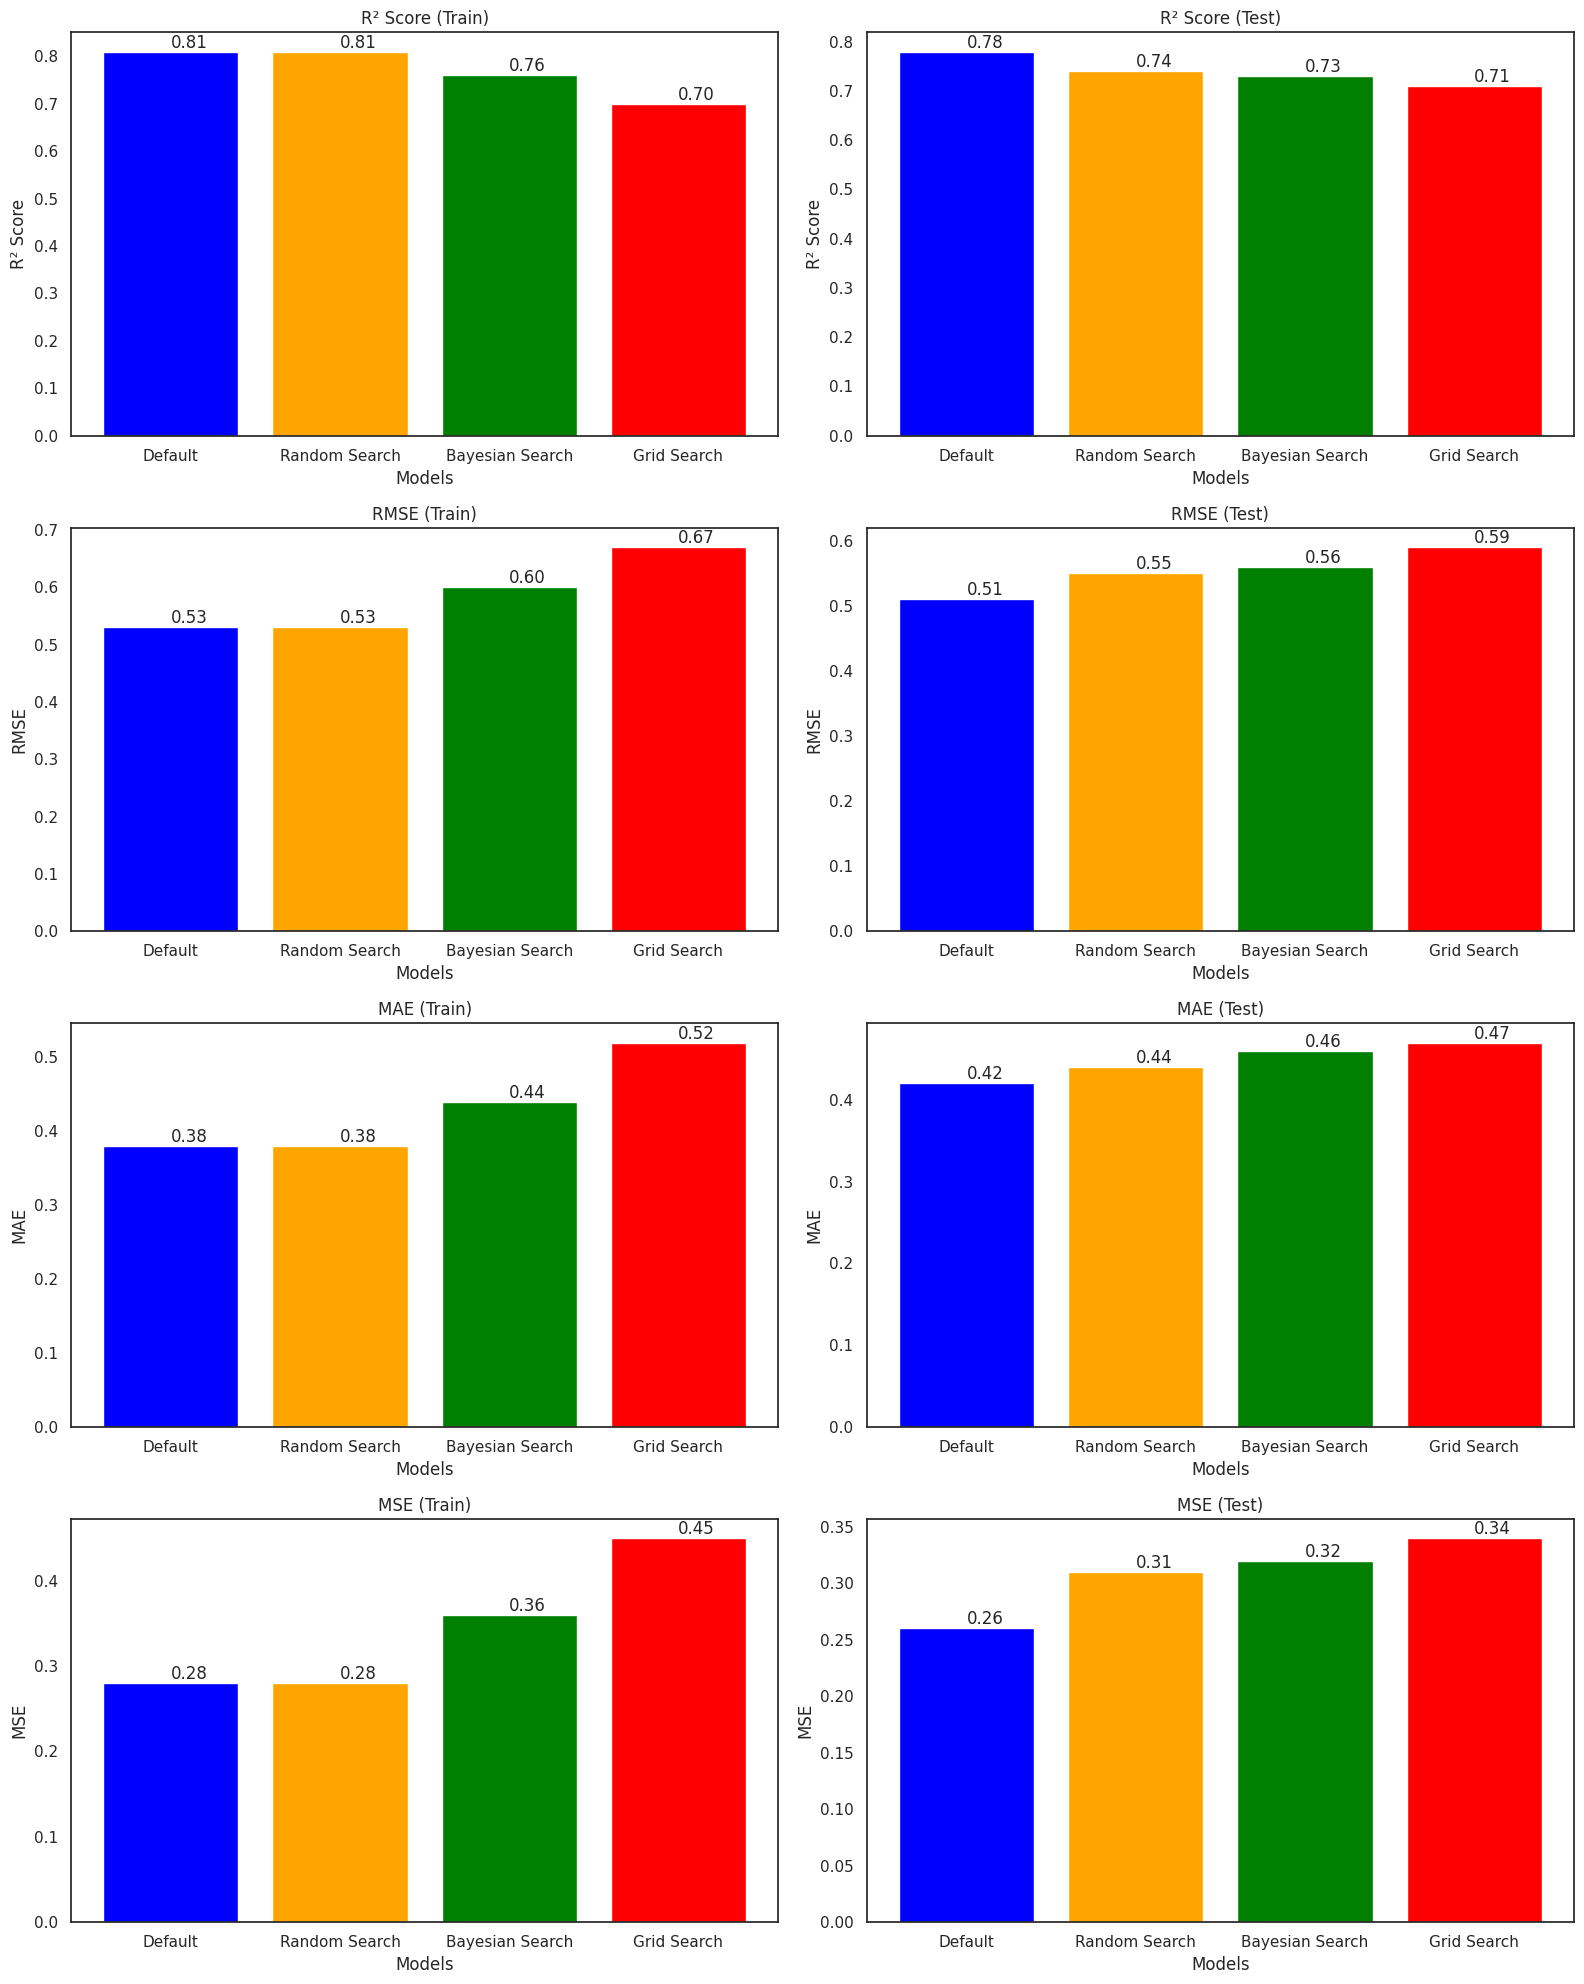

In [51]:
# Create figure and axis objects for training and testing comparisons
fig, axs = plt.subplots(4, 2, figsize=(16, 20))

# Define the metrics
metrics = ['R² Score', 'RMSE', 'MAE', 'MSE']
colors = ['blue', 'orange', 'green', 'red']
datasets = ['Train', 'Test']

# Plot each metric for training and testing datasets
for i, metric in enumerate(metrics):
    for j, dataset in enumerate(datasets):
        ax = axs[i, j]
        model_names = list(results.keys())
        metric_values = [results[model][dataset][metric][0] for model in model_names]

        bars = ax.bar(model_names, metric_values, color=colors)
        ax.set_title(f'{metric} ({dataset})')
        ax.set_ylabel(metric)
        ax.set_xlabel('Models')

        # Adding value labels on the bars
        for bar in bars:
            yval = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.2f}', va='bottom')  # va: vertical alignment

plt.tight_layout()
plt.show()

# Random Search was selected

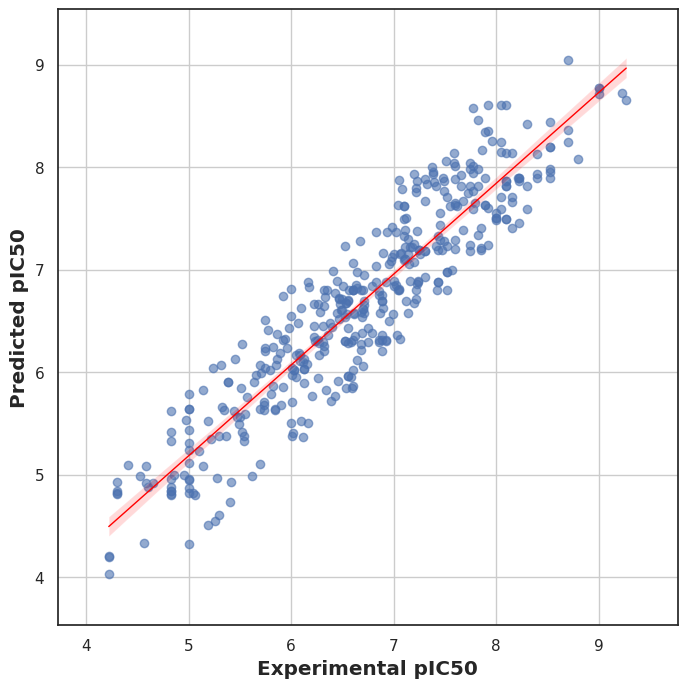

In [52]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Ensure seaborn and matplotlib styles are set
sns.set(color_codes=True)
sns.set_style("white")

# Get predictions from the Random Search optimized model
y_predito_teste_random = modelo_sem_outliers.predict(x_teste_sem_outliers)

# Calculate residuals
residuos = y_teste_sem_outliers - y_predito_teste_random

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_teste_sem_outliers, y_predito_teste_random))

# Calculate standard deviation of residuals
desvio_padrao_residuos = np.std(residuos)

# Define a threshold to identify outliers (2.5 * standard deviation)
limite = 1.5 * desvio_padrao_residuos

# Find indices of points beyond the threshold
indices_outliers = np.where(np.abs(residuos) > limite)

# Remove outliers from data
y_teste_clean = np.delete(y_teste_sem_outliers, indices_outliers)
y_predito_clean = np.delete(y_predito_teste_random, indices_outliers)

# Ensure that arrays are of type float64
y_teste_clean = y_teste_clean.astype(np.float64)
y_predito_clean = y_predito_clean.astype(np.float64)

# Build the scatter plot without outliers
plt.figure(figsize=(8, 8))
ax = sns.regplot(x=y_teste_clean, y=y_predito_clean, scatter_kws={'alpha': 0.6}, line_kws={'color': 'red', 'linewidth': 1})

# Set labels and limits
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(min(y_teste_clean) - 0.5, max(y_teste_clean) + 0.5)  # Adjust limits dynamically
ax.set_ylim(min(y_predito_clean) - 0.5, max(y_predito_clean) + 0.5)  # Adjust limits dynamically

# Add grid for better visualization
plt.grid(True)

# Show the plot
plt.show()


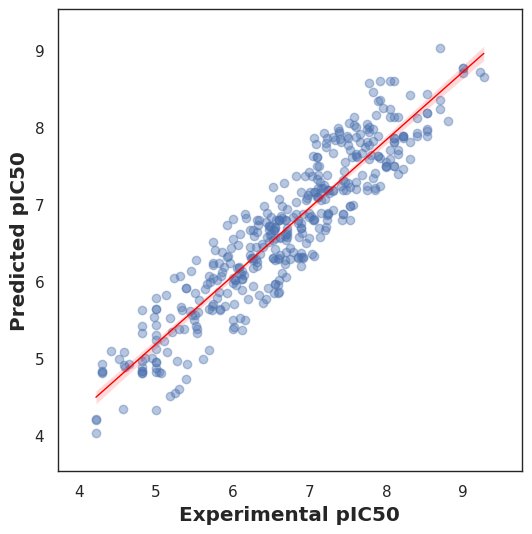

In [53]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Ensure seaborn and matplotlib styles are set
sns.set(color_codes=True)
sns.set_style("white")

# Get predictions from the Random Search optimized model
y_predito_teste_random = modelo_sem_outliers.predict(x_teste_sem_outliers)

# Calculate residuals
residuos = y_teste_sem_outliers - y_predito_teste_random

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_teste_sem_outliers, y_predito_teste_random))

# Calculate standard deviation of residuals
desvio_padrao_residuos = np.std(residuos)

# Define a threshold to identify outliers (2.0 * standard deviation)
limite = 1.5 * desvio_padrao_residuos

# Find indices of points beyond the threshold
indices_outliers = np.where(np.abs(residuos) > limite)

# Remove outliers from data
y_teste_clean = np.delete(y_teste_sem_outliers, indices_outliers)
y_predito_clean = np.delete(y_predito_teste_random, indices_outliers)

# Ensure that arrays are of type float64
y_teste_clean = y_teste_clean.astype(np.float64)
y_predito_clean = y_predito_clean.astype(np.float64)

# Build the scatter plot with trend line
plt.figure(figsize=(6, 6))
ax = sns.regplot(
    x=y_teste_clean,
    y=y_predito_clean,
    scatter_kws={'alpha': 0.4},  # Adjust transparency of scatter points
    line_kws={'color': 'red', 'linewidth': 1}  # Trend line color and thickness
)

# Set axis labels
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')

# Set axis limits to keep the plot square
xlim = (min(y_teste_clean) - 0.5, max(y_teste_clean) + 0.5)
ylim = (min(y_predito_clean) - 0.5, max(y_predito_clean) + 0.5)
ax.set_xlim(xlim)
ax.set_ylim(ylim)

# Adjust aspect ratio to be square
ax.set_aspect('equal', adjustable='box')

# Customize spines to keep only vertical and horizontal lines
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)

# Optionally, adjust the appearance of the spines
ax.spines['top'].set_linewidth(1)    # Top spine width
ax.spines['right'].set_linewidth(1)  # Right spine width
ax.spines['left'].set_linewidth(1)   # Left spine width
ax.spines['bottom'].set_linewidth(1) # Bottom spine width

# Show the plot
plt.show()


#SHAP VALUES ANALYSIS

In [54]:
## Step 1: Installing SHAP VALUES
## Step 3: Import and view the pre-treated database
## step 3: Defining the predictor and response variables
## step 4: Selection of important variables
## Step 5: splitting training and testing data
## Step 6: Training the Top 5 machine learning models
## Step 7: Shap Values
## Step 8: Comparison of important features

# Screening of FDA-Approved drugs with optimized model

In [61]:
### 3.1: Importing the dataset

from google.colab import files
uploaded = files.upload()

Saving DESCRITORES PUBCHEM.csv to DESCRITORES PUBCHEM.csv


In [62]:
### 3.2: Visualizing the imported dataset

import pandas as pd
df2 = pd.read_csv("DESCRITORES PUBCHEM.csv")
display (df2)

,Unnamed: 0,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,0,ZINC000001530427,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,ZINC000003807804,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,ZINC000000120286,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,ZINC000242548690,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,ZINC000000008492,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1571,1571,ZINC000022010387,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1572,1572,ZINC000022448097,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1573,1573,ZINC000100370145,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1574,1574,ZINC000059111167,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
## Removing non-informative variable
df2 = df2.drop("Unnamed: 0", axis = 1)
df2 = df2.drop("Name", axis = 1)

In [64]:
df2.head()

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [65]:
import pandas as pd

# Assuming 'x_treino' is your training DataFrame and 'df2' is the external DataFrame

# Getting the common columns in the same order as x_treino
common_columns = list(x_treino.columns.intersection(df2.columns))  # Common columns in the same order as x_treino

# Check if we have all the necessary columns
if set(common_columns) != set(x_treino.columns):
    raise ValueError("As colunas em df2 não correspondem completamente às colunas em x_treino.")

# Reorganizing the columns in the external DataFrame to match the order of the columns in the training set
external_data_aligned = df2[common_columns]

# Making predictions using the aligned columns in the external data
predictions = modelo_sem_outliers.predict(external_data_aligned)

In [66]:
# Saving the predicted dataset (predictions)

import pandas as pd

# Convert predictions to a DataFrame (if it's not already)
predicted_df = pd.DataFrame(predictions, columns=['Predicted_Column_Name'])  # Replace 'Predicted_Column_Name' with the appropriate name

# Save the predicted data as a CSV file
predicted_df.to_csv('FDA - HGB LEPRA F.csv', index=False)
# Trigger the download of the file in Google Colab
from google.colab import files
files.download('FDA - HGB LEPRA F.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Saving the model

In [67]:
import joblib

# Save the model to a file
joblib.dump(modelo_sem_outliers, 'LEPRA modelo_sem_outliers-HGB F.pkl')

['LEPRA modelo_sem_outliers-HGB F.pkl']

In [68]:
!pip install joblib

In [69]:
# Installing the shape value library
!pip install shap

In [70]:
# To calculate SHAP values ​​for the model, we need to create an "Explainer" object
# the Explainer object will be used to evaluate a sample or dataset with

# Importing the SHAP library
import shap

In [71]:
# Adjusting the explainer
explainer = shap.Explainer(modelo_sem_outliers.predict, x_teste_sem_outliers)
# Calculating the SHAP values - it takes a while
shap_values = explainer(x_teste_sem_outliers, max_evals=600)

PermutationExplainer explainer: 500it [36:06,  4.34s/it]


In [72]:
# If we simply want the feature importances as determined by the SHAP algorithm,
# we need to get the average mean value of each feature
import numpy as np
from scipy.special import softmax

def print_feature_importances_shap_values(shap_values, features):
    '''
    Prints the feature importances based on SHAP values in an ordered way
    shap_values -> The SHAP values calculated from a shap.Explainer object
    features -> The name of the features, on the order presented to the explainer
    '''
    # Calculates the feature importance (mean absolute shap value) for each feature
    importances = []
    for i in range(shap_values.values.shape[1]):
        importances.append(np.mean(np.abs(shap_values.values[:, i])))
    # Calculates the normalized version
    importances_norm = softmax(importances)
    # Organize the importances and columns in a dictionary
    feature_importances = {fea: imp for imp, fea in zip(importances, features)}
    feature_importances_norm = {fea: imp for imp, fea in zip(importances_norm, features)}
    # Sorts the dictionary
    feature_importances = {k: v for k, v in sorted(feature_importances.items(), key=lambda item: item[1], reverse = True)}
    feature_importances_norm= {k: v for k, v in sorted(feature_importances_norm.items(), key=lambda item: item[1], reverse = True)}
    # Prints the feature importances
    for k, v in feature_importances.items():
        print(f"{k} -> {v:.4f} (softmax = {feature_importances_norm[k]:.4f})")

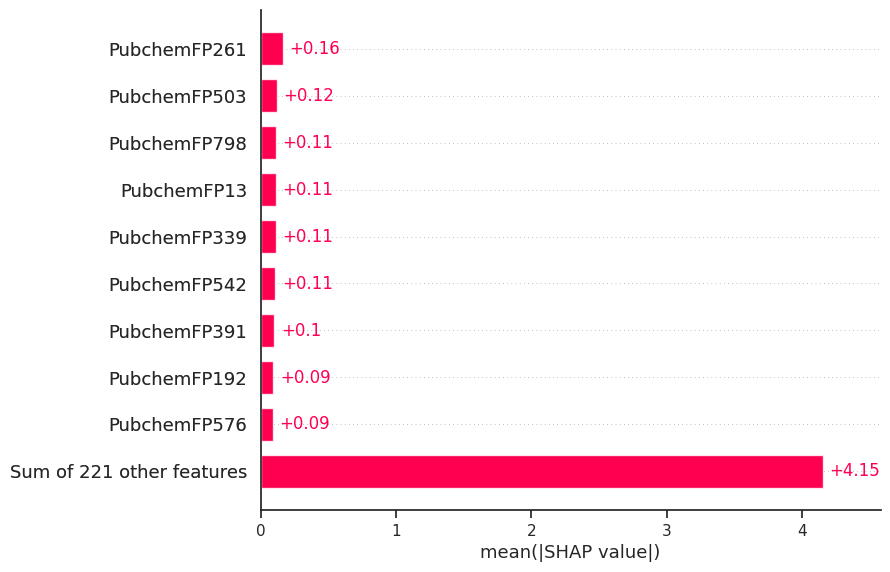

In [73]:
# Analyzing the global effect of the features:
shap.plots.bar(shap_values)

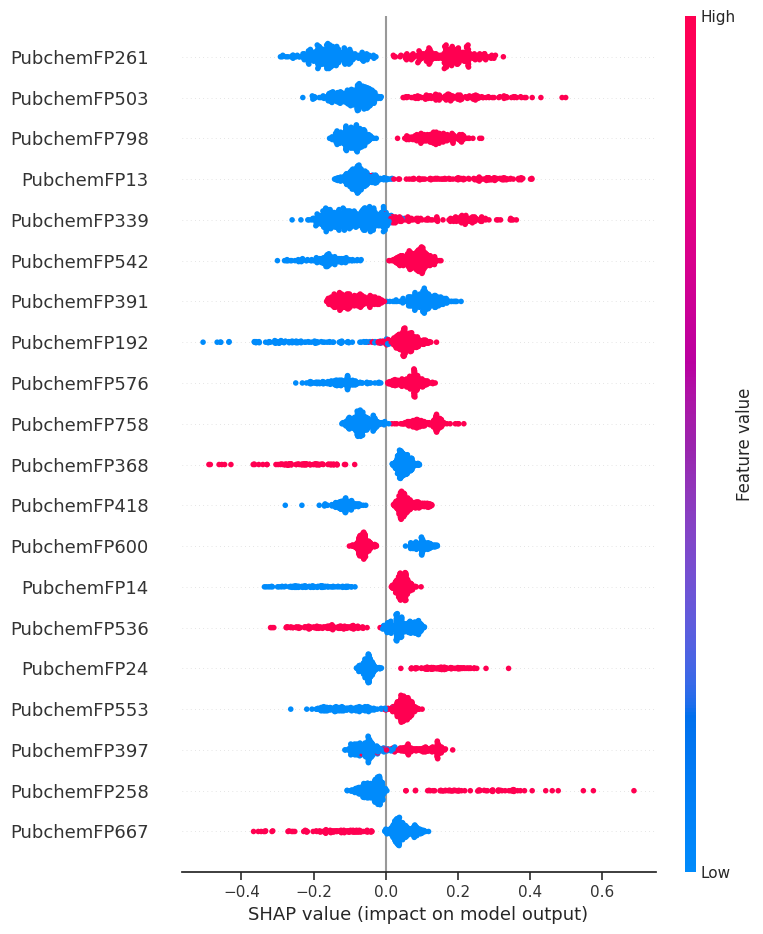

In [74]:
# Feature importance summary chart: OPTION 1
shap.summary_plot(shap_values)

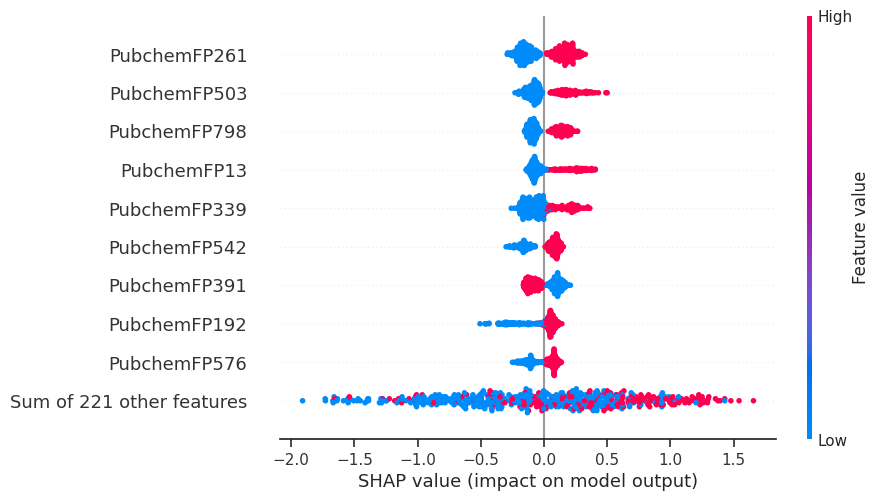

In [75]:
# Feature importance summary chart: OPTION 2
shap.plots.beeswarm(shap_values)

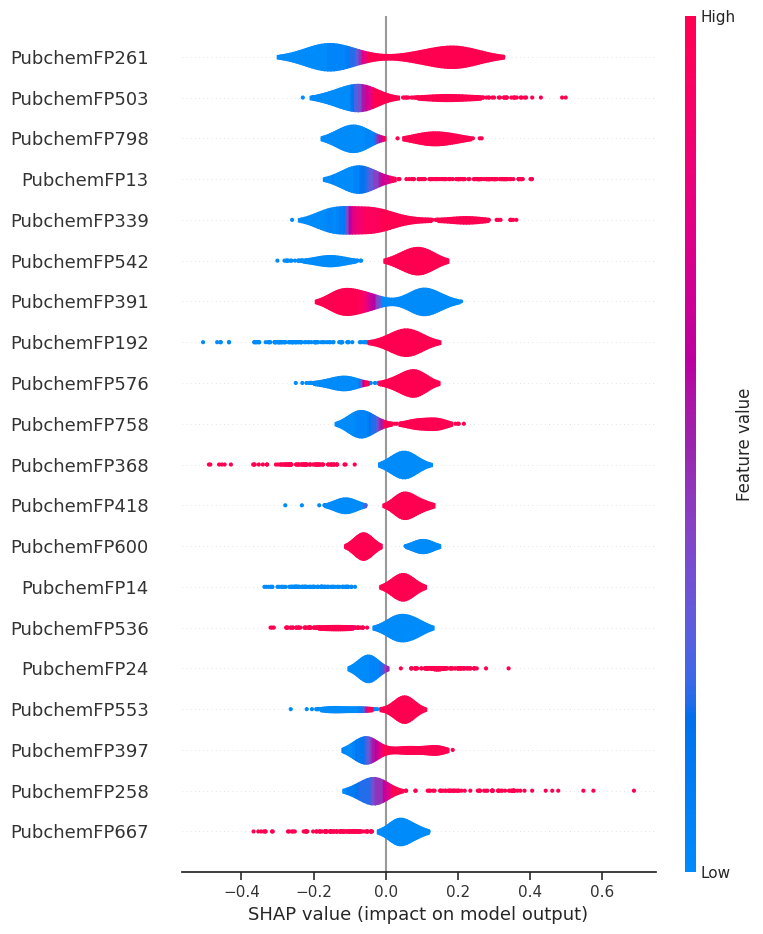

In [76]:
# Feature importance summary chart: OPTION 3
shap.summary_plot(shap_values, plot_type='violin')

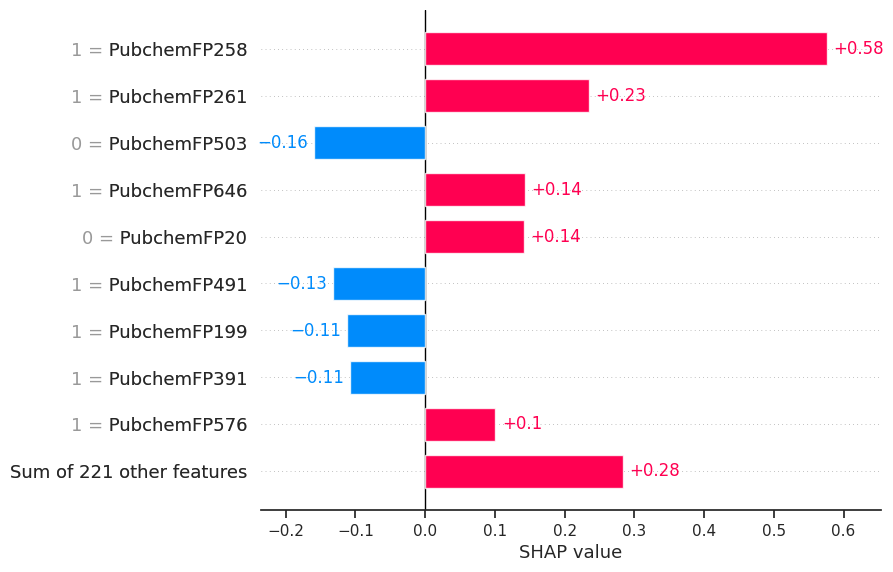

In [77]:
# Building the local bar graph to analyze the local effect of each variable:
# This graph shows us which are the main features that affect the forecast of a...
# single sample (molecule) and the magnitude of the SHAP value for each feature.
shap.plots.bar(shap_values[0])